In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

In [172]:
df=pd.read_csv("mixed_columns_plname.csv")

In [173]:
df.head()

,P. Name,P. Zone Class,P. Mass Class,P. Composition Class,P. Atmosphere Class,P. Habitable Class,P. Min Mass (EU),P. Mass (EU),P. Radius (EU),P. Density (EU),...,S. Mag from Planet,S. Size from Planet (deg),S. Hab Zone Min (AU),S. Hab Zone Max (AU),P. HZD,P. HZC,P. HZA,P. HZI,P. ESI,P. Habitable
0,1RXS 1609 b,0,0,0,0,1,1318.48628,4451.16,19.04,0.64,...,-13.2,0.0022,0.540,1.362,800.07,23.51,85.62,0.00,0.05,0
1,1SWASP J1407 b,0,0,0,0,1,6358.80000,6358.80,10.94,4.86,...,-22.5,0.1353,0.461,1.143,9.07,15.30,45.41,0.02,0.07,0
2,2M 0103-55(AB) b,0,0,0,0,1,4133.22000,4133.22,11.40,2.79,...,-13.2,0.0024,0.136,0.347,793.67,12.57,107.44,0.00,0.06,0
3,2M 0122-24 b,0,0,0,0,1,1318.48628,6358.80,11.20,4.53,...,-14.2,0.0039,0.136,0.347,490.45,15.72,119.46,0.00,0.08,0
4,2M 0219-39 b,0,0,0,0,1,1318.48628,4419.37,16.13,1.05,...,-10.1,0.0009,0.062,0.165,3028.82,19.46,133.25,0.00,0.06,0


## Training & Testing Split

In [178]:
X=df.iloc[:,1:42]
Y=df.iloc[:,42]

In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

## Feature Scaling (Normalization & Standardization)

In [182]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

X_train

array([[ 0.07986132, -1.26140898, -0.89875188, ..., -0.14223054,
        -1.06274727, -1.35646734],
       [ 0.07986132, -0.23473588, -0.89875188, ..., -0.19496145,
         0.12991118, -0.03114239],
       [ 0.07986132, -1.26140898, -0.89875188, ..., -0.08332022,
        -1.24623319, -1.50372567],
       ...,
       [ 0.07986132, -1.26140898, -0.89875188, ..., -0.09279531,
        -0.69577544,  0.33700343],
       [-2.49524155,  1.30527377,  1.02846209, ..., -0.13028369,
        -1.70494797,  0.1897451 ],
       [ 0.07986132,  1.30527377,  1.02846209, ..., -0.21679535,
         0.68036892,  0.26337426]])

In [224]:
import joblib
joblib.dump(sc, 'habitability_scaler.pkl')

['habitability_scaler.pkl']

# Model Building:
## 1. LeakyRelu

In [183]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras import metrics

classifier=Sequential()

In [ ]:
LRelu=LeakyReLU(alpha=0.5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
classifier.add(Dense(units=20,kernel_initializer='he_uniform',activation=LRelu,input_dim=41))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=12,kernel_initializer='he_uniform',activation=LRelu))
classifier.add(Dropout(0.3))
classifier.add(Dense(units=12,kernel_initializer='he_uniform',activation=LRelu))
classifier.add(Dropout(0.4))
classifier.add(Dense(units=3,kernel_initializer='glorot_uniform',activation='softmax'))
classifier.compile(optimizer = 'Adamax', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_history=classifier.fit(X_train, Y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2889 - loss: 2.6673 - val_accuracy: 0.8462 - val_loss: 0.6975
Epoch 2/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5780 - loss: 1.3875 - val_accuracy: 0.9580 - val_loss: 0.3609
Epoch 3/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7394 - loss: 0.9620 - val_accuracy: 0.9770 - val_loss: 0.2215
Epoch 4/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8466 - loss: 0.5746 - val_accuracy: 0.9780 - val_loss: 0.1610
Epoch 5/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9059 - loss: 0.4455 - val_accuracy: 0.9790 - val_loss: 0.1325
Epoch 6/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9257 - loss: 0.4750 - val_accuracy: 0.9790 - val_loss: 0.1175
Epoch 7/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9461 - loss: 0.3244 - val_accuracy: 0.9790 - val_loss: 0.1099
Epoch 8/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9549 - loss: 0.2554 - val_accu

In [ ]:
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


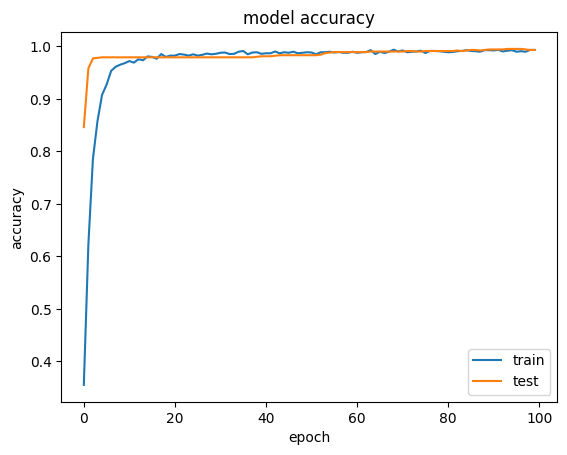

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.savefig('LeakyReluModelAccuracyat200WithDropout.png')
plt.show()

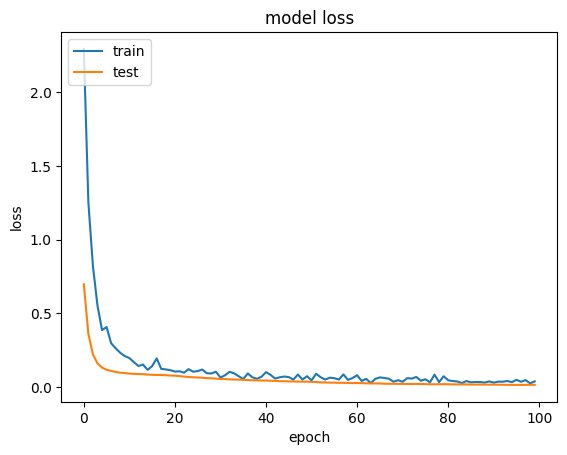

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('LeakyRelyModelLossAt200WithDropout.png')
plt.show()

In [ ]:
Y_pred = np.argmax(classifier.predict(X_test),axis=1)
# Y_pred = (Y_pred > 0.5)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

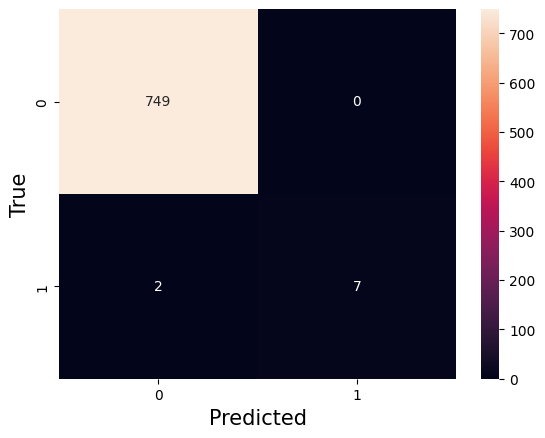

In [ ]:
ax= plt.subplot()
sns.heatmap(cm,annot=True,ax=ax,fmt='g')
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
ax.set_ylabel('True', fontsize=15)
plt.savefig('LeakyReluPredAt200WithDropout.png')

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [ ]:
print(f1_score(Y_test, Y_pred, average=None))
print(accuracy_score(Y_test,Y_pred,normalize=True))
print(precision_score(Y_test,Y_pred,average=None,zero_division='warn'))
print(recall_score(Y_test, Y_pred, average=None))

[0.99866667 0.875     ]
0.9973614775725593
[0.99733688 1.        ]
[1.         0.77777778]


# Model Building (3) SELU

In [184]:
classifier.add(Dense(units=20,kernel_initializer='he_uniform',activation='selu',input_dim=41))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=12,kernel_initializer='he_uniform',activation='selu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(units=12,kernel_initializer='he_uniform',activation='selu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(units=3,kernel_initializer='glorot_uniform',activation='softmax'))
classifier.compile(optimizer = 'Adamax', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [185]:
model_history=classifier.fit(X_train, Y_train,validation_split=0.33, batch_size = 10, epochs = 200)

Epoch 1/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4497 - loss: 2.8339 - val_accuracy: 0.6883 - val_loss: 1.1176
Epoch 2/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5874 - loss: 1.7156 - val_accuracy: 0.8132 - val_loss: 0.6556
Epoch 3/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6822 - loss: 1.0964 - val_accuracy: 0.8811 - val_loss: 0.4191
Epoch 4/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7495 - loss: 1.0049 - val_accuracy: 0.9181 - val_loss: 0.2780
Epoch 5/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8202 - loss: 0.6724 - val_accuracy: 0.9491 - val_loss: 0.1995
Epoch 6/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8762 - loss: 0.4327 - val_accuracy: 0.9590 - val_loss: 0.1542
Epoch 7/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9051 - loss: 0.3853 - val_accuracy: 0.9590 - val_loss: 0.1298
Epoch 8/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9042 - loss: 0.3696 - val_accu

In [186]:
Y_pred = np.argmax(classifier.predict(X_test),axis=1)
#Y_pred = (Y_pred > 0.5)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [187]:
df_pred = pd.DataFrame({
    "planet index": Y_test.index,
    'Actual Habitability': Y_test,
    'Predicted Habitability': Y_pred
})
df_pred

,planet index,Actual Habitability,Predicted Habitability
1580,1580,0,0
2257,2257,0,0
263,263,0,0
1837,1837,0,0
3653,3653,0,0
...,...,...,...
3527,3527,0,0
734,734,0,0
505,505,0,0
1641,1641,0,0


In [188]:
df_pred.to_csv("RESULTS.csv", index=False)

In [189]:
manual_input = np.array([[2, 5, 2, 1, 0, 1.4, 1.4, 1.15, 0.91, 1.05, 1.1, 1.176261, 1.474785, 1.874486,
                         265.3, 280, 298.1, 1.3, -17.92, 2.19, 9.87, 0.0496, 0.12, 0.05, 0, 0.17, 0.2,
                         3192, 0.003604, -0.02, 5, 11.2, -27.2, 2.1279, 0.049, 0.13, -0.99,
                         -0.17, -0.46, 0.48, 0.86]])

manual_input_standardized = sc.transform(manual_input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [190]:
# Make predictions
manual_pred = classifier.predict(manual_input_standardized)
# 5. Display the prediction
predicted_class = np.argmax(manual_pred, axis=1)
print("Predicted Probability Distribution:", manual_pred)
print("Predicted Class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Probability Distribution: [[0.02215154 0.9747268  0.0031216 ]]
Predicted Class: [1]


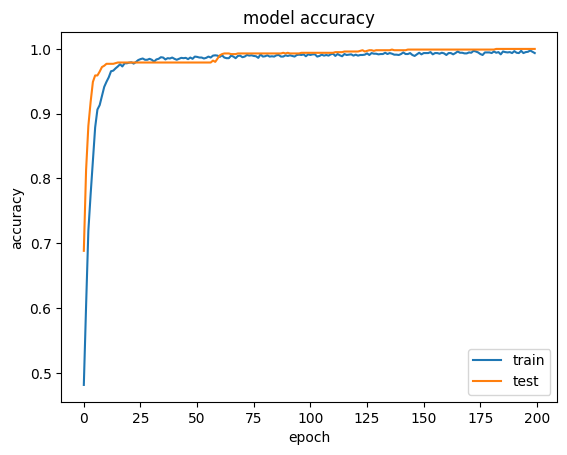

In [191]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.savefig('SeluModelAccuracyat200WithDropout.png')
plt.show()

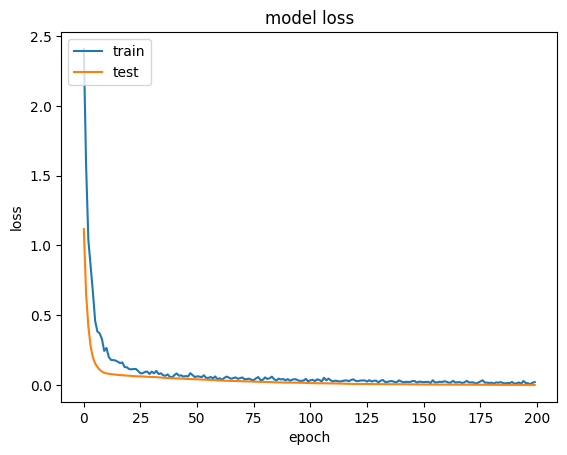

In [192]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('SeluModelLossAt200WithDropout.png')
plt.show()

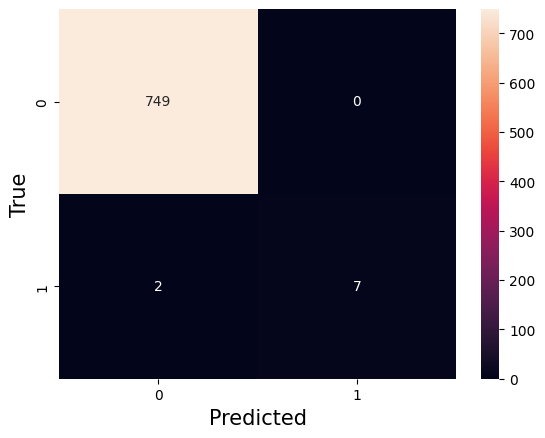

In [193]:
ax= plt.subplot()
sns.heatmap(cm,annot=True,ax=ax,fmt='g')
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
ax.set_ylabel('True', fontsize=15)
plt.savefig('SeluPredAt200WithDropout.png')

In [194]:
print(f1_score(Y_test, Y_pred, average=None))
print(accuracy_score(Y_test,Y_pred,normalize=True))
print(precision_score(Y_test,Y_pred,average=None,zero_division='warn'))
print(recall_score(Y_test, Y_pred, average=None))

[1. 1.]
1.0
[1. 1.]
[1. 1.]


In [215]:
# Step 1: Filter rows where 'Predicted Habitability' is 1
predicted_as_1 = df_pred[df_pred['Predicted Habitability'] == 1]

predicted_as_1

,planet index,Actual Habitability,Predicted Habitability
3400,3400,1,1
256,256,1,1
240,240,1,1
985,985,1,1
2119,2119,1,1
1517,1517,1,1
3567,3567,1,1
1061,1061,1,1
3395,3395,1,1


In [216]:
# Step 2: Retrieve planet information from the original DataFrame df
planet_indices = predicted_as_1['planet index'].values  # Extract the planet index column
planet_info = df.loc[planet_indices]  # Use the extracted indices to retrieve planet data
planet_info

,P. Name,P. Zone Class,P. Mass Class,P. Composition Class,P. Atmosphere Class,P. Habitable Class,P. Min Mass (EU),P. Mass (EU),P. Radius (EU),P. Density (EU),...,S. Mag from Planet,S. Size from Planet (deg),S. Hab Zone Min (AU),S. Hab Zone Max (AU),P. HZD,P. HZC,P. HZA,P. HZI,P. ESI,P. Habitable
3400,KIC-5522786 b,2,5,2,1,0,1318.48628,1.75,1.23,0.94,...,-28.0,0.4223,2.053,4.731,-0.99,-0.16,-0.48,0.47,0.67,1
256,GJ 3293 d,2,4,2,1,2,7.63000,7.63,1.85,1.20,...,-26.1,1.1179,0.119,0.309,-0.21,-0.14,0.91,0.52,0.70,1
240,GJ 832 c,2,4,2,1,0,5.40000,5.40,1.69,1.12,...,-26.7,1.4679,0.132,0.342,-0.71,-0.15,0.44,0.54,0.81,1
985,K2-9 b,2,4,2,0,0,1318.48628,16.77,2.25,1.47,...,-27.1,1.8155,0.087,0.228,-0.95,-0.12,1.45,0.37,0.71,1
2119,Kepler-442 b,2,5,2,1,2,1318.48628,2.34,1.34,0.97,...,-26.3,0.7685,0.274,0.681,-0.34,-0.16,-0.06,0.73,0.84,1
1517,Kepler-174 d,2,4,2,0,2,1318.48628,14.78,2.18,1.42,...,-25.8,0.4880,0.348,0.846,0.32,-0.13,1.77,0.36,0.61,1
3567,Ross 128 b,2,5,2,1,0,1.40000,1.40,1.15,0.91,...,-27.2,2.1279,0.049,0.130,-0.99,-0.17,-0.46,0.48,0.86,1
1061,K2-72 e,2,5,2,1,0,1318.48628,2.73,1.40,0.99,...,-27.1,1.7588,0.120,0.311,-0.99,-0.16,-0.12,0.50,0.82,1
3395,Kepler-1652 b,2,5,2,1,2,1318.48628,1.26,1.12,0.90,...,-26.3,1.1835,0.104,0.270,-0.35,-0.17,-0.37,0.65,0.85,1


In [217]:
# Step 3: Standardize the corresponding rows using the previously fitted scaler
X_filtered = X.loc[predicted_as_1['planet index']]  # Extract input features
X_filtered_standardized = sc.transform(X_filtered)  # Standardize using the fitted scaler

In [218]:
# Step 4: Get prediction probabilities from the model
predicted_confidence = classifier.predict(X_filtered_standardized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [219]:
# Step 5: Add confidence (likelihood of class 1) to the planet information
planet_info = planet_info.copy()
planet_info['Predicted Confidence'] = predicted_confidence[:, 1]  # Class 1 confidence

In [220]:
print("Planets Predicted as Habitable (Class 1) with Confidence:")
print(planet_info)


Planets Predicted as Habitable (Class 1) with Confidence:
            P. Name  P. Zone Class  P. Mass Class  P. Composition Class  \
3400  KIC-5522786 b              2              5                     2   
256       GJ 3293 d              2              4                     2   
240        GJ 832 c              2              4                     2   
985          K2-9 b              2              4                     2   
2119   Kepler-442 b              2              5                     2   
1517   Kepler-174 d              2              4                     2   
3567     Ross 128 b              2              5                     2   
1061        K2-72 e              2              5                     2   
3395  Kepler-1652 b              2              5                     2   

      P. Atmosphere Class  P. Habitable Class  P. Min Mass (EU)  P. Mass (EU)  \
3400                    1                   0        1318.48628          1.75   
256                     1    

In [221]:
planet_info.to_csv("planets_predicted_as_habitable.csv", index=True)


In [222]:
# Reverse mappings for each encoded column
zone_class_mapping = {0: 'Cold', 1: 'Hot', 2: 'Warm'}
mass_class_mapping = {0: 'Jovian', 1: 'Mercurian', 2: 'Neptunian', 3: 'Subterran', 4: 'Superterran', 5: 'Terran'}
composition_class_mapping = {0: 'gas', 1: 'iron', 2: 'rocky-iron', 3: 'rocky-water', 4: 'water-gas'}
atmosphere_class_mapping = {0: 'hydrogen-rich', 1: 'metals-rich', 2: 'no-atmosphere'}
habitable_class_mapping = {0: 'non-habitable', 1: 'mesoplanet', 2: 'thermoplanet'}


In [223]:
# Convert numerical classes back to categorical values
planet_info['P. Zone Class'] = planet_info['P. Zone Class'].replace(zone_class_mapping)
planet_info['P. Mass Class'] = planet_info['P. Mass Class'].replace(mass_class_mapping)
planet_info['P. Composition Class'] = planet_info['P. Composition Class'].replace(composition_class_mapping)
planet_info['P. Atmosphere Class'] = planet_info['P. Atmosphere Class'].replace(atmosphere_class_mapping)
planet_info['P. Habitable Class'] = planet_info['P. Habitable Class'].replace(habitable_class_mapping)

# Display the updated DataFrame
print("Planets Predicted as Habitable (Class 1) with Categorical Class Values:")
print(planet_info)

# Save to a CSV file
planet_info.to_csv("planets_predicted_as_habitable_with_classes.csv")


Planets Predicted as Habitable (Class 1) with Categorical Class Values:
            P. Name P. Zone Class P. Mass Class P. Composition Class  \
3400  KIC-5522786 b          Warm        Terran           rocky-iron   
256       GJ 3293 d          Warm   Superterran           rocky-iron   
240        GJ 832 c          Warm   Superterran           rocky-iron   
985          K2-9 b          Warm   Superterran           rocky-iron   
2119   Kepler-442 b          Warm        Terran           rocky-iron   
1517   Kepler-174 d          Warm   Superterran           rocky-iron   
3567     Ross 128 b          Warm        Terran           rocky-iron   
1061        K2-72 e          Warm        Terran           rocky-iron   
3395  Kepler-1652 b          Warm        Terran           rocky-iron   

     P. Atmosphere Class P. Habitable Class  P. Min Mass (EU)  P. Mass (EU)  \
3400         metals-rich      non-habitable        1318.48628          1.75   
256          metals-rich       thermoplanet      

PREDICTING MARS

In [228]:
mars_data = np.array([[
    0,     # P. Zone Class: Cold
    0,     # P. Mass Class: Subterran
    0,     # P. Composition Class: Rocky-Iron
    0,     # P. Atmosphere Class: Thin CO2
    1,     # P. Habitable Class: Mesoplanet
    0.1,   # P. Min Mass (EU)
    0.107, # P. Mass (EU)
    0.532, # P. Radius (EU)
    0.71,  # P. Density (EU)
    0.38,  # P. Gravity (EU)
    0.45,  # P. Esc Vel (EU)
    0.43,  # PSFluxMin
    0.5,   # PSFluxMean
    0.57,  # PSFluxMax
    200,   # P. Teq Min (K)
    210,   # P. Teq Mean (K)
    220,   # P. Teq Max (K)
    0.006, # P. Surf Press (EU)
    -2.0,  # P. Mag
    0.008, # P. Appar Size (deg)
    687,   # P. Period (days)
    1.52,  # P. Sem Major Axis (AU)
    0.0934,# P. Eccentricity
    1.52,  # P. Mean Distance (AU)
    48.0,  # P. Omega (deg)
    1.0,   # S. Mass (SU)
    1.0,   # S. Radius (SU)
    5778,  # S. Teff (K)
    1.0,   # S. Luminosity (SU)
    -0.1,  # S. [Fe/H]
    4.6,   # S. Age (Gyrs)
    0.5,   # S. Appar Mag
    1.0,   # S. Mag from Planet
    0.02,  # S. Size from Planet (deg)
    0.98,  # S. Hab Zone Min (AU)
    1.67,  # S. Hab Zone Max (AU)
    0.75,  # P. HZD
    0.95,  # P. HZC
    0.85,  # P. HZA
    0.90,  # P. HZI
    0.74   # P. ESI
]])
# Load the saved scaler and model
scaler = joblib.load('habitability_scaler.pkl')
# Scale the Mars input data
mars_data_scaled = scaler.transform(mars_data)

# Make a prediction
prediction = classifier.predict(mars_data_scaled)

# 5. Display the prediction
predicted_class = np.argmax(prediction, axis=1)
print("Predicted Probability Distribution:", prediction)
print("Predicted Class:", predicted_class)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicted Probability Distribution: [[9.9999344e-01 4.3878226e-06 2.0976506e-06]]
Predicted Class: [0]


In [ ]:
# Save the entire model
classifier.save('SELU_Habitable.h5')  # Saves the model as 'my_model.h5'
print("Model saved successfully!")

Model saved successfully!


In [ ]:
print(f1_score(Y_test, Y_pred, average=None))
print(accuracy_score(Y_test,Y_pred,normalize=True))
print(precision_score(Y_test,Y_pred,average=None,zero_division='warn'))
print(recall_score(Y_test, Y_pred, average=None))

[0.99933289 0.94117647]
0.9986807387862797
[0.99866667 1.        ]
[1.         0.88888889]


In [235]:
# Jupiter Data
jupiter_data = np.array([[
    0,     # P. Zone Class: Cold
    2,     # P. Mass Class: Gas Giant
    1,     # P. Composition Class: Gas
    1,     # P. Atmosphere Class: Hydrogen-Helium
    0,     # P. Habitable Class: Uninhabitable
    318.0, # P. Min Mass (EU)
    317.8, # P. Mass (EU)
    11.2,  # P. Radius (EU)
    1.33,  # P. Density (EU)
    24.79, # P. Gravity (EU)
    60.2,  # P. Esc Vel (EU)
    0.014, # PSFluxMin
    0.02,  # PSFluxMean
    0.025, # PSFluxMax
    130,   # P. Teq Min (K)
    150,   # P. Teq Mean (K)
    170,   # P. Teq Max (K)
    0.005, # P. Surf Press (EU)
    -9.0,  # P. Mag
    0.05,  # P. Appar Size (deg)
    4333,  # P. Period (days)
    5.2,   # P. Sem Major Axis (AU)
    0.048, # P. Eccentricity
    5.2,   # P. Mean Distance (AU)
    150.0, # P. Omega (deg)
    1.0,   # S. Mass (SU)
    1.0,   # S. Radius (SU)
    5778,  # S. Teff (K)
    1.0,   # S. Luminosity (SU)
    0.0,   # S. [Fe/H]
    4.5,   # S. Age (Gyrs)
    -9.5,  # S. Appar Mag
    1.0,   # S. Mag from Planet
    0.5,   # S. Size from Planet (deg)
    4.95,  # S. Hab Zone Min (AU)
    7.5,   # S. Hab Zone Max (AU)
    0.1,   # P. HZD
    0.2,   # P. HZC
    0.3,   # P. HZA
    0.25,  # P. HZI
    0.2    # P. ESI
]])

# Scale the Jupiter data
jupiter_data_scaled = scaler.transform(jupiter_data)

# Make prediction for Jupiter
jupiter_prediction = classifier.predict(jupiter_data_scaled)

# Display the prediction for Jupiter
print("Jupiter Predicted Class:", np.argmax(jupiter_prediction, axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Jupiter Predicted Class: [0]


In [236]:
# Save the model weights
joblib.dump(classifier, 'SELU_Habitable_weights.pkl')


['SELU_Habitable_weights.pkl']